In [1]:
import numpy as np

In [2]:
import snsims
import healpy as hp

In [3]:
from astropy.cosmology import Planck15 as cosmo

In [7]:
help(snsims.PowerLawRates)

Help on class PowerLawRates in module snsims.paramDistribution:

class PowerLawRates(snsims.populationParamSamples.RateDistributions)
 |  This class is a concrete implementation of `RateDistributions` with the
 |  following properties:
 |  - The SN rate : The SN rate is a single power law with numerical
 |      coefficients (alpha, beta)  passed into the instantiation. The rate is
 |      the number of SN at redshift z per comoving volume per unit observer
 |      time over the entire sky expressed in units of numbers/Mpc^3/year 
 |  - A binning in redshift is used to perform the calculation of numbers of SN.
 |      This is assumed
 |  - The expected number of SN in each of these redshift bins is computed using
 |      the rate above, and a cosmology to compute the comoving volume for the
 |      redshift bin
 |  - The numbers of SN are determined by a Poisson Distribution about the
 |      expected number in each redshift bin,  determined with a random state
 |      passed in as an a

In [31]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1), 
                             fieldArea=9.6,
                             surveyDuration=10.,
                             zbinEdges=np.arange(0.010001, 1.1, 0.1))

In [32]:
# ten years
zdist.DeltaT

10.0

In [33]:
# The sky is >~ 40000 sq degrees ~ 4000 * LSST field of view
zdist.skyFraction * 2000 * 2

0.93084226773030898

In [34]:
zdist.zbinEdges

array([ 0.010001,  0.110001,  0.210001,  0.310001,  0.410001,  0.510001,
        0.610001,  0.710001,  0.810001,  0.910001,  1.010001])

In [36]:
zdist.zSampleSize().sum()

11989.600801547122

In [37]:
zdist.zbinEdges

array([ 0.010001,  0.110001,  0.210001,  0.310001,  0.410001,  0.510001,
        0.610001,  0.710001,  0.810001,  0.910001,  1.010001])

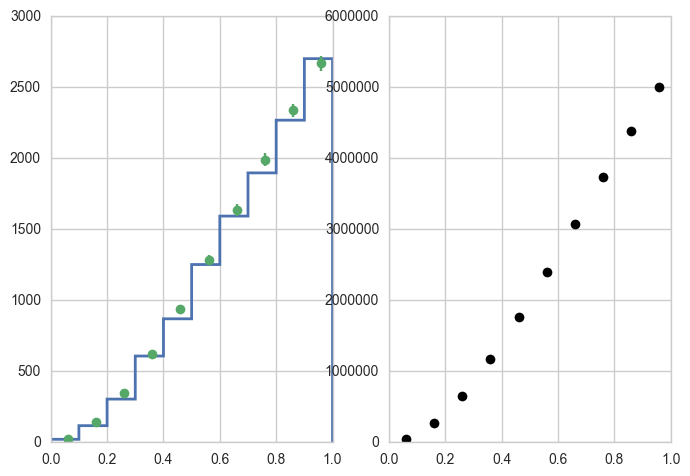

In [47]:
fig, ax = plt.subplots(1, 2)
_ = ax[0].hist(zdist.zSamples, bins=np.arange(0., 1.1, 0.1), histtype='step', lw=2)
_ = ax[0].errorbar(0.5*(zdist.zbinEdges[:-1]+zdist.zbinEdges[1:]), zdist.zSampleSize(),
                   yerr=np.sqrt(zdist.zSampleSize()), fmt='o')
_ = ax[1].plot(0.5*(zdist.zbinEdges[:-1]+zdist.zbinEdges[1:]), 
               18000*zdist.zSampleSize()/ zdist.fieldArea, 'ko')

On the left subplot, the histogram shows the samples of redshift actually simulated as a function of z. The green points are the number of samples that were expected from the rate, time, and area. The error bars show the square root of the number. 

On the right subplot, we show the numbers expected in 18000 degrees of a sky from this redshift distribution 

## Comparison with rate being used by David Rubin

In [49]:
# To compare wih David's rate divide by number of days (note bins go from 0.1 to 1.0 in steps of 0.1)
zdist.zSampleSize() / 3650.

array([ 0.00690149,  0.03939113,  0.09594164,  0.17046038,  0.25718015,
        0.35109249,  0.44812537,  0.5451468 ,  0.63986955,  0.73071314])

In [50]:
# Get samples of those numbers and histogram (consistency, should not be new information) 
np.histogram(zdist.zSamples, np.arange(0.1, 1.01, 0.1))[0]/3650.

array([ 0.03205479,  0.08328767,  0.16630137,  0.23808219,  0.34273973,
        0.43616438,  0.51945205,  0.62109589,  0.73972603])

In [51]:
otherEstimate = np.array([0.0297949656, 0.0773033283291, 0.143372148164, 0.224245838014, 0.315868414203, 0.413859866222
, 0.513435128451, 0.609346340913, 0.696255385228])


In [52]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

ValueError: x and y must have same first dimension

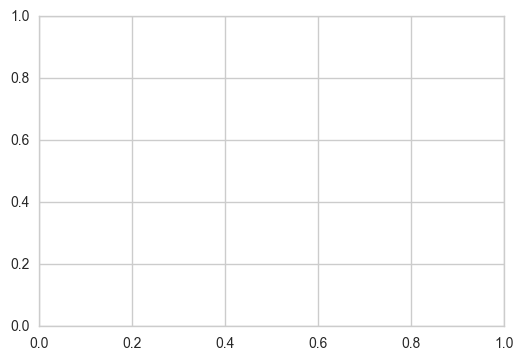

In [53]:
fig, ax = plt.subplots()
zvals = np.arange(0.15, 0.96, 0.1)
ax.plot(zvals, zdist.zSampleSize()/ 3650., 'or', label='snsims ')
ax.plot(zvals, otherEstimate, 'bs', label='David Rubin')
ax.set_xlabel('z')
ax.set_ylabel('numbers per field per day')

## Parts of the calculation

In [13]:
zbin_edges = np.arange(0.1, 1.01, 0.1)
diff_volume = cosmo.comoving_volume(zbin_edges[1:]) - cosmo.comoving_volume(zbin_edges[:-1])
print diff_volume

[  2.17006770e+09   5.32151113e+09   9.30243830e+09   1.37157266e+10
   1.82594260e+10   2.27178757e+10   2.69472784e+10   3.08599635e+10
   3.44098469e+10] Mpc3


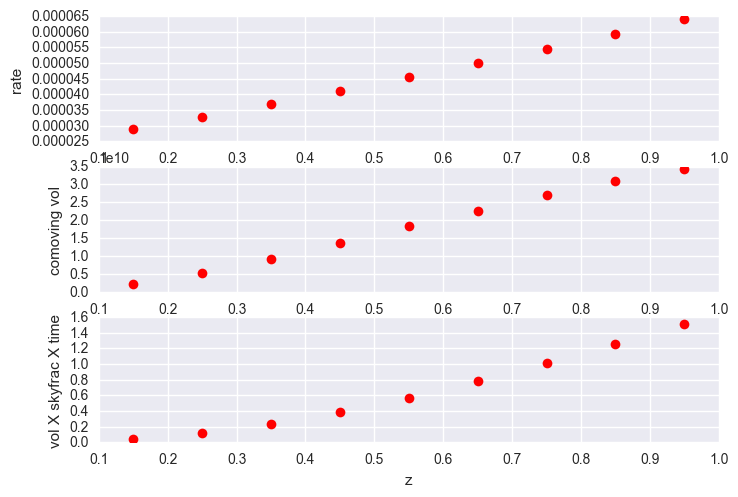

In [14]:
fig_subs, axs = plt.subplots(3)
axs[0].plot(zvals, zdist.snRate(zvals), 'or')
axs[1].plot(zvals, diff_volume , 'or')
axs[2].plot(zvals, diff_volume * zdist.snRate(zvals)*10.0/40000. / 365.0, 'or')
axs[2].set_xlabel('z')
axs[0].set_ylabel('rate')
axs[1].set_ylabel('comoving vol')
axs[2].set_ylabel('vol X skyfrac X time')

##  Total Number of SN per square degree

In [17]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1), 
                             fieldArea=1.,
                             surveyDuration=1.,
                             zbinEdges=np.arange(0.010001, 0.501, 0.05))

In [26]:
zdist.zSampleSize().sum()

16.366433611683881

UnboundLocalError: local variable 'ymin' referenced before assignment

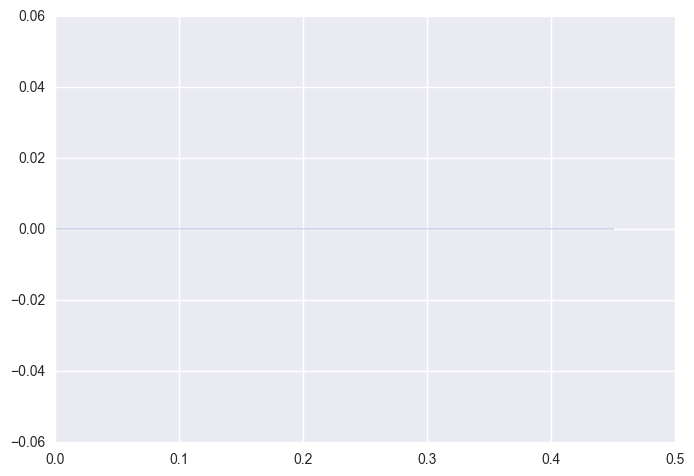

In [20]:
fig, ax  = plt.subplots()
_ = ax.hist(zdist.numSN(), bins=np.arange(0.001, 0.5, 0.05), 
            histtype='step', lw=2., alpha=1.)

## Total Number of SN

In [15]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1), 
                             fieldArea=18000.,
                             surveyDuration=10.,
                             zbinEdges=np.arange(0.010001, 0.901, 0.1))

In [16]:
zdist.zSampleSize().sum() /1.0e6

13.100576240318187

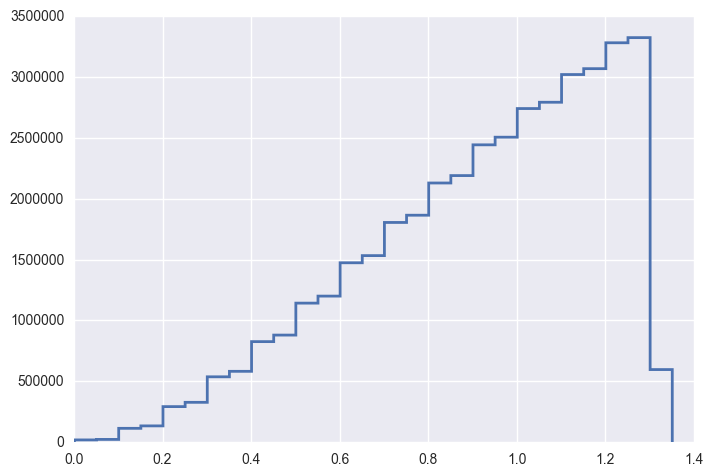

In [22]:
fig, ax  = plt.subplots()
_ = ax.hist(zdist.zSamples, bins=np.arange(0.001, 1.4, 0.05), histtype='step', lw=2., alpha=1.)

In [ ]:
arcmin = 1.0 / 60. 

In [24]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1), 
                             fieldArea=10.,
                             surveyDuration=10.,
                             zbinEdges=np.arange(0.010001, 0.901, 0.05))

In [28]:
np.array(map(np.float, zdist.numSN())) /5.

array([   0.4,    3.8,    8.4,   18.4,   30.4,   44.4,   61.6,   74.6,
         89.8,  102. ,  127.2,  150.6,  146.2,  187.8,  196.8,  217. ,
        230.8])

In [20]:
np.pi * (1.0 / 12.)**2

0.02181661564992912

In [21]:
10.0 / 200.

0.05